In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('D:\Anaconda\ecommerce.csv')
df


,Unnamed: 0,category,product,Original_price,price,perc_of_unit_sold,rating,shpping_rate,gender
0,0,Athletic Shoes,Nike SB Check Solar Cnvs Skateboarding Shoes f...,299.0,211.48,94.0,100.0,FREE Shipping,men
1,1,Athletic Shoes,Nike Md Runner 2 Two-Tone Textile-Mesh Suede-A...,349.0,289.99,80.0,88.0,FREE Shipping,men
2,2,Athletic Shoes,"Nike air Heights Sneaker for Women , Size 38 E...",419.0,337.48,77.0,NaN,FREE Shipping,women
3,3,Athletic Shoes,"Nike Fitness Shoes For Men , 43 EU , Black",319.0,211.48,76.0,80.0,FREE Shipping,men
4,4,Athletic Shoes,"adidas ASWEERUN Sneaker for Mens, Grey - Size ...",259.0,194.99,94.0,NaN,Eligible for FREE Shipping,men
...,...,...,...,...,...,...,...,...,...
604,175,Watches,JBW Delmare Men's 4 Genuine Diamonds Silicone ...,2624.0,575.99,72.0,92.0,FREE Shipping,men
605,176,Watches,Michael Kors Lexington Women's White Dial Stai...,762.0,564.98,28.0,76.0,FREE Shipping,women
606,177,Watches,Puma Casual Watch For Men Analog Stainless Ste...,679.0,262.98,67.0,94.0,FREE Shipping,men
607,178,Watches,"T5 Watch For Men [Rubber,Chronograph]-H3397G-B",440.0,115.49,40.0,86.0,Eligible for FREE Shipping,men


In [92]:
df.head()
#5 penjualan teratas sesuai data

,Unnamed: 0,category,Original_price,price,perc_of_unit_sold,shpping_rate,gender
0,0,Athletic Shoes,299.0,211.48,94.0,FREE Shipping,men
1,1,Athletic Shoes,349.0,289.99,80.0,FREE Shipping,men
2,2,Athletic Shoes,419.0,337.48,77.0,FREE Shipping,women
3,3,Athletic Shoes,319.0,211.48,76.0,FREE Shipping,men
4,4,Athletic Shoes,259.0,194.99,94.0,Eligible for FREE Shipping,men


# Permasalahan

In [6]:

""" dari data tersebut dapat saya simpukan beberapa masalah yang dapat dipecahkan
1. jumlah pembelian tipe gender dari masing masing product
2. pemilihan product berdasarkan ongkirnya manakah yang lebih banyak dibeli apakah item yang gratis ongkir atau item dengan syarat untuk mendapatkan gratis ongkir yang paling laris
3. secara keseluruhan manakah penjualan yang paling banyak tanpa memandang jenis produk, harga dll"


' dari data tersebut dapat saya simpukan beberapa masalah yang dapat dipecahkan\n1. keberagaman wanita dan pria dalam memilih produk berdasarkan harga\n2. pemilihan product berdasarkan ongkirnya'

# Tujuan EDA

# Analisis EDA

In [7]:
df.dtypes

Unnamed: 0             int64
category              object
product               object
Original_price       float64
price                float64
perc_of_unit_sold    float64
rating               float64
shpping_rate          object
gender                object
dtype: object

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,609.0,60.072250,47.287663,0.0,21.00,46.00,92.00,179.0
Original_price,583.0,864.498113,1803.365527,42.0,273.00,499.00,980.00,29970.0
price,609.0,339.434039,285.416406,21.4,140.98,262.49,444.99,3220.0
perc_of_unit_sold,522.0,57.678161,25.434947,2.0,36.25,60.00,79.00,99.0
rating,427.0,87.807963,11.422350,20.0,82.00,88.00,96.00,100.0


In [9]:
df.isnull().sum()

Unnamed: 0             0
category               0
product                0
Original_price        26
price                  0
perc_of_unit_sold     87
rating               182
shpping_rate          42
gender                28
dtype: int64

In [10]:
round(((df['category'].isnull().sum())/(len(df)))*100)

0.0

In [11]:
round(((df["product"].isnull().sum())/(len(df)))*100)

0.0

In [12]:
round(((df['price'].isnull().sum())/(len(df)))*100)

0.0

# Mengatasi Missing Value

In [ ]:
saya mendrop nilai yang hilang karena nilai hilang ada pada harga dan saya tidak memperkirakan harga
karena saya fokus pada gender, category dan promo ongkir
jadi tidak perlu mengisi nilai dari mossing value sama sekali

In [13]:
"""1.kolom dari category tidak dapat di drop karena itu ada dalam permasalahan
2. kolom product bisa di drop karena problem yang akan diselesaikan tidak mempertimbagkan nama product
3. harga tidak dapat di drop karena akan berpengaruh pada selera pemilihan sesuai gender"""

'1.kolom dari category tidak dapat di drop karena itu ada dalam permasalahan\n2. kolom product bisa di drop karena problem yang akan diselesaikan tidak mempertimbagkan nama product\n3. harga tidak dapat di drop karena akan berpengaruh pada selera pemilihan sesuai gender'

In [14]:
df.drop(['product'],axis=1, inplace=True)

In [15]:
df


,Unnamed: 0,category,Original_price,price,perc_of_unit_sold,rating,shpping_rate,gender
0,0,Athletic Shoes,299.0,211.48,94.0,100.0,FREE Shipping,men
1,1,Athletic Shoes,349.0,289.99,80.0,88.0,FREE Shipping,men
2,2,Athletic Shoes,419.0,337.48,77.0,NaN,FREE Shipping,women
3,3,Athletic Shoes,319.0,211.48,76.0,80.0,FREE Shipping,men
4,4,Athletic Shoes,259.0,194.99,94.0,NaN,Eligible for FREE Shipping,men
...,...,...,...,...,...,...,...,...
604,175,Watches,2624.0,575.99,72.0,92.0,FREE Shipping,men
605,176,Watches,762.0,564.98,28.0,76.0,FREE Shipping,women
606,177,Watches,679.0,262.98,67.0,94.0,FREE Shipping,men
607,178,Watches,440.0,115.49,40.0,86.0,Eligible for FREE Shipping,men


#drop rating karena tidak memakai rating dan tidak ada hubungannya pada problem

In [16]:
df.drop(['rating'],axis=1,inplace=True)
df

,Unnamed: 0,category,Original_price,price,perc_of_unit_sold,shpping_rate,gender
0,0,Athletic Shoes,299.0,211.48,94.0,FREE Shipping,men
1,1,Athletic Shoes,349.0,289.99,80.0,FREE Shipping,men
2,2,Athletic Shoes,419.0,337.48,77.0,FREE Shipping,women
3,3,Athletic Shoes,319.0,211.48,76.0,FREE Shipping,men
4,4,Athletic Shoes,259.0,194.99,94.0,Eligible for FREE Shipping,men
...,...,...,...,...,...,...,...
604,175,Watches,2624.0,575.99,72.0,FREE Shipping,men
605,176,Watches,762.0,564.98,28.0,FREE Shipping,women
606,177,Watches,679.0,262.98,67.0,FREE Shipping,men
607,178,Watches,440.0,115.49,40.0,Eligible for FREE Shipping,men


In [18]:
""" jadi tabel yang dibutuhkan dalam problem ini adalah category, original price, price, perc_of_unit_sold, shipping_rate dan gendernya"""

' jadi tabel yang dibutuhkan dalam problem ini adalah category, original price, price, perc_of_unit_sold, shipping_rate dan gendernya'

In [20]:
df['category'].unique()
#ini adalah jenis-jenis sepatu yang dijual

array(['Athletic Shoes', 'Casual & Dress Shoes', 'Eyewear',
       'Perfumes & Fragrances', 'Sportswear', 'Wallets', 'Watches'],
      dtype=object)

In [22]:
dfbersih = df.dropna()

In [23]:
dfbersih['category'].unique()

array(['Athletic Shoes', 'Casual & Dress Shoes', 'Eyewear',
       'Perfumes & Fragrances', 'Sportswear', 'Wallets', 'Watches'],
      dtype=object)

In [26]:
dfbersih.isnull().sum()
#data sudah bagus

Unnamed: 0           0
category             0
Original_price       0
price                0
perc_of_unit_sold    0
shpping_rate         0
gender               0
dtype: int64

# pengecekan hasil penjualan

In [29]:
dfbersih['category'].value_counts()
#pengecekan jumlah total dari barang-barang yang dijual

Watches                  128
Eyewear                  120
Athletic Shoes            76
Perfumes & Fragrances     60
Casual & Dress Shoes      35
Wallets                   29
Sportswear                24
Name: category, dtype: int64

# penjualan item watches berdasarkan gender 

In [39]:
#pengecekan penjualan masing2 item
penjualan1=dfbersih[dfbersih['category']=='Watches']
penjualan1

,Unnamed: 0,category,Original_price,price,perc_of_unit_sold,shpping_rate,gender
430,1,Watches,929.0,426.49,77.0,FREE Shipping,women
431,2,Watches,2990.0,564.98,94.0,FREE Shipping,women
433,4,Watches,2040.0,1088.48,68.0,FREE Shipping,women
436,7,Watches,929.0,647.99,70.0,FREE Shipping,men
437,8,Watches,1596.0,639.99,91.0,FREE Shipping,men
...,...,...,...,...,...,...,...
604,175,Watches,2624.0,575.99,72.0,FREE Shipping,men
605,176,Watches,762.0,564.98,28.0,FREE Shipping,women
606,177,Watches,679.0,262.98,67.0,FREE Shipping,men
607,178,Watches,440.0,115.49,40.0,Eligible for FREE Shipping,men


In [67]:
penjualan1['gender'].value_counts()

men       83
women     40
Unisex     5
Name: gender, dtype: int64

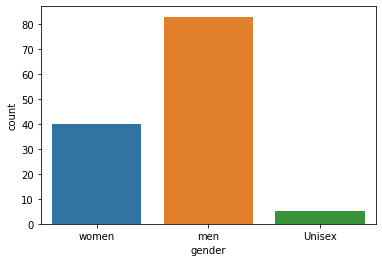

In [106]:
sns.countplot(x = penjualan1['gender'])
#menggunakan olot biasa untuk melihat perbandingan tipe gender pada item pada penjualan

In [ ]:
#hasil membuktikan bahwa item watches lebih banyak yang dibeli adalah item untuk laki-laki

# penjualan item eyewear

In [33]:
penjualan2=dfbersih[dfbersih['category']=='Eyewear']
penjualan2

,Unnamed: 0,category,Original_price,price,perc_of_unit_sold,shpping_rate,gender
142,0,Eyewear,650.0,346.98,52.0,FREE Shipping,Unisex
143,1,Eyewear,750.0,351.98,25.0,FREE Shipping,Unisex
144,2,Eyewear,770.0,427.98,89.0,FREE Shipping,men
145,3,Eyewear,1050.0,308.00,81.0,FREE Shipping,men
146,4,Eyewear,997.0,444.99,57.0,FREE Shipping,Unisex
...,...,...,...,...,...,...,...
289,147,Eyewear,880.0,409.49,33.0,FREE Shipping,Unisex
291,149,Eyewear,950.0,409.49,33.0,FREE Shipping,Unisex
292,150,Eyewear,1100.0,558.99,16.0,FREE Shipping,men
293,151,Eyewear,840.0,360.99,22.0,FREE Shipping,Unisex


In [102]:
penjualan2['gender'].value_counts()

Unisex    64
men       43
women     13
Name: gender, dtype: int64

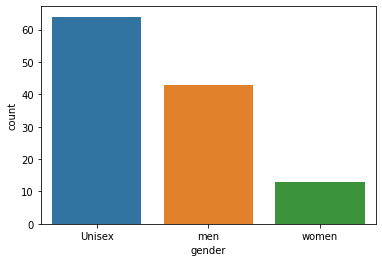

In [107]:
sns.countplot(x = penjualan2['gender'])
#menggunakan olot biasa untuk melihat perbandingan tipe gender pada item pada penjualan

In [ ]:
#membuktikan bahwa penjualan item eyewear yang paling laris adalah item unisex

# penjualan item atletic shoes

In [34]:
penjualan3=dfbersih[dfbersih['category']=='Athletic Shoes']
penjualan3

,Unnamed: 0,category,Original_price,price,perc_of_unit_sold,shpping_rate,gender
0,0,Athletic Shoes,299.0,211.48,94.0,FREE Shipping,men
1,1,Athletic Shoes,349.0,289.99,80.0,FREE Shipping,men
2,2,Athletic Shoes,419.0,337.48,77.0,FREE Shipping,women
3,3,Athletic Shoes,319.0,211.48,76.0,FREE Shipping,men
4,4,Athletic Shoes,259.0,194.99,94.0,Eligible for FREE Shipping,men
...,...,...,...,...,...,...,...
86,86,Athletic Shoes,339.0,189.00,85.0,Eligible for FREE Shipping,women
87,87,Athletic Shoes,249.0,139.00,50.0,Eligible for FREE Shipping,men
88,88,Athletic Shoes,299.0,159.00,20.0,Eligible for FREE Shipping,women
93,93,Athletic Shoes,289.0,192.99,23.0,Eligible for FREE Shipping,men


In [44]:
penjualan3['gender'].value_counts()

men       56
women     19
Unisex     1
Name: gender, dtype: int64

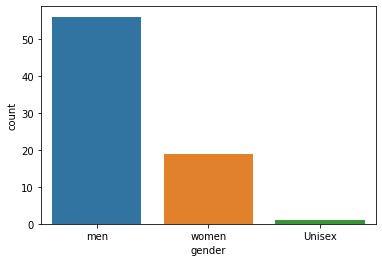

In [108]:
sns.countplot(x = penjualan3['gender'])
#menggunakan olot biasa untuk melihat perbandingan tipe gender pada item pada penjualan

In [ ]:
#membuktikan bahwa penjualan pada item athlectic shoes paling laris adalah item dengan tipe gender pria

# penjualan pada item parfun dan fragrances

In [35]:
penjualan4=dfbersih[dfbersih['category']=='Perfumes & Fragrances']
penjualan4

,Unnamed: 0,category,Original_price,price,perc_of_unit_sold,shpping_rate,gender
296,0,Perfumes & Fragrances,357.0,111.21,77.0,Eligible for FREE Shipping,women
297,1,Perfumes & Fragrances,55.0,32.39,64.0,Eligible for FREE Shipping,Unisex
298,2,Perfumes & Fragrances,279.0,65.10,76.0,Eligible for FREE Shipping,women
299,3,Perfumes & Fragrances,273.0,69.90,25.0,Eligible for FREE Shipping,men
300,4,Perfumes & Fragrances,147.0,67.41,67.0,Eligible for FREE Shipping,women
301,5,Perfumes & Fragrances,289.0,73.12,84.0,Eligible for FREE Shipping,men
302,6,Perfumes & Fragrances,525.0,105.22,75.0,Eligible for FREE Shipping,women
303,7,Perfumes & Fragrances,79.0,26.54,67.0,Eligible for FREE Shipping,women
304,8,Perfumes & Fragrances,263.0,71.95,77.0,Eligible for FREE Shipping,women
305,9,Perfumes & Fragrances,357.0,84.98,97.0,Eligible for FREE Shipping,women


In [46]:
penjualan4['gender'].value_counts()

women     32
men       23
Unisex     5
Name: gender, dtype: int64

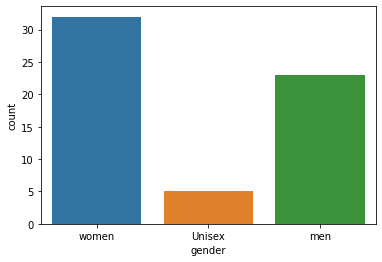

In [109]:
sns.countplot(x = penjualan4['gender'])
#menggunakan olot biasa untuk melihat perbandingan tipe gender pada item pada penjualan

In [ ]:
#penjualan ini membuktikan bahwa item parfume dan fragnances paling laris adalah item dengan gender wanita

# penjualan item casual & Dress Shoes

In [36]:
penjualan5=dfbersih[dfbersih['category']=='Casual & Dress Shoes']
penjualan5

,Unnamed: 0,category,Original_price,price,perc_of_unit_sold,shpping_rate,gender
95,0,Casual & Dress Shoes,519.0,295.98,14.0,FREE Shipping,men
96,1,Casual & Dress Shoes,469.0,268.49,50.0,FREE Shipping,men
97,2,Casual & Dress Shoes,459.0,262.49,66.0,FREE Shipping,men
98,3,Casual & Dress Shoes,459.0,262.49,60.0,FREE Shipping,men
99,4,Casual & Dress Shoes,539.0,309.98,87.0,FREE Shipping,men
100,5,Casual & Dress Shoes,139.0,100.49,63.0,Eligible for FREE Shipping,men
101,6,Casual & Dress Shoes,479.0,215.48,67.0,FREE Shipping,men
102,7,Casual & Dress Shoes,189.0,90.49,94.0,Eligible for FREE Shipping,men
103,8,Casual & Dress Shoes,759.0,553.98,37.0,FREE Shipping,men
104,9,Casual & Dress Shoes,209.0,100.49,39.0,Eligible for FREE Shipping,men


In [45]:
penjualan5['gender'].value_counts()

men      32
women     3
Name: gender, dtype: int64

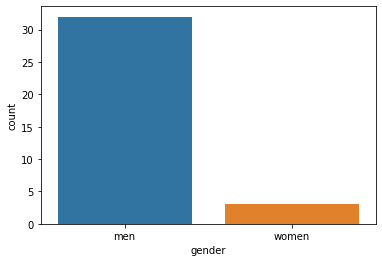

In [110]:
sns.countplot(x = penjualan5['gender'])
#menggunakan olot biasa untuk melihat perbandingan tipe gender pada item pada penjualan

In [ ]:
#penjualan membuktikan bahwa item dari casual and dress paling laris adalah item dengan gender laki-laki

# penjualan wallets(dompet)

In [37]:
penjualan6=dfbersih[dfbersih['category']=='Wallets']
penjualan6

,Unnamed: 0,category,Original_price,price,perc_of_unit_sold,shpping_rate,gender
392,0,Wallets,469.0,172.48,5.0,Eligible for FREE Shipping,women
393,1,Wallets,469.0,172.48,3.0,Eligible for FREE Shipping,women
396,4,Wallets,195.0,84.00,15.0,Eligible for FREE Shipping,men
397,5,Wallets,160.0,78.49,14.0,Eligible for FREE Shipping,men
398,6,Wallets,160.0,77.49,32.0,Eligible for FREE Shipping,men
399,7,Wallets,110.0,57.00,75.0,Eligible for FREE Shipping,men
400,8,Wallets,125.0,47.99,69.0,Eligible for FREE Shipping,men
401,9,Wallets,125.0,50.00,26.0,Eligible for FREE Shipping,men
402,10,Wallets,430.0,343.49,76.0,FREE Shipping,men
403,11,Wallets,160.0,95.00,4.0,Eligible for FREE Shipping,men


In [47]:
penjualan6['gender'].value_counts()

men       23
women      5
Unisex     1
Name: gender, dtype: int64

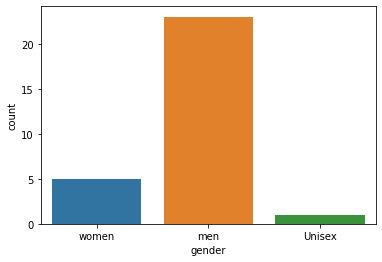

In [113]:
sns.countplot(x = penjualan6['gender'])
#menggunakan olot biasa untuk melihat perbandingan tipe gender pada item pada penjualan

In [48]:
#membuktikan bahwa penjualan item wallets paling banyak adalah item gender laki-laki

# penjualan sportwear

In [38]:
penjualan7=dfbersih[dfbersih['category']=='Sportswear']
penjualan7

,Unnamed: 0,category,Original_price,price,perc_of_unit_sold,shpping_rate,gender
359,0,Sportswear,419.0,175.98,35.0,Eligible for FREE Shipping,men
360,1,Sportswear,139.0,79.99,56.0,Eligible for FREE Shipping,men
363,4,Sportswear,229.0,176.48,66.0,Eligible for FREE Shipping,men
365,6,Sportswear,155.0,77.98,33.0,Eligible for FREE Shipping,women
366,7,Sportswear,115.0,59.48,57.0,Eligible for FREE Shipping,men
367,8,Sportswear,109.0,51.99,66.0,Eligible for FREE Shipping,women
368,9,Sportswear,140.0,69.98,88.0,Eligible for FREE Shipping,men
369,10,Sportswear,100.0,51.99,69.0,Eligible for FREE Shipping,men
370,11,Sportswear,100.0,51.99,33.0,Eligible for FREE Shipping,women
371,12,Sportswear,155.0,77.98,76.0,Eligible for FREE Shipping,women


In [49]:
penjualan7['gender'].value_counts()

men      13
women    11
Name: gender, dtype: int64

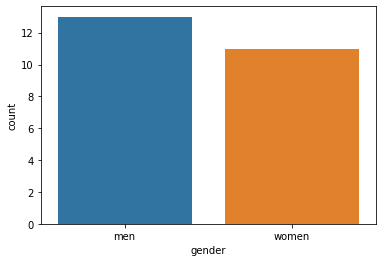

In [112]:
sns.countplot(x = penjualan7['gender'])
#menggunakan olot biasa untuk melihat perbandingan tipe gender pada item pada penjualan

In [50]:
#penjualan membuktikan bahwa pembelian yang paling banyak adalah item dengan gender laki-laki

# kesimpulan 1
untuk penjualan masing masing item paling banyak adalah item dengan tipe gender :
1. Watches = Laki-Laki
2. Eyewear = Unisex
3. Athletic Shoes = Laki-Laki
4. Perfumes & Fragrances = Wanita
5. Casual & Dress Shoes= laki-Laki
6. Wallets = Laki-Laki
7. Sport Wear = Laki-Laki

# Problem 2

In [59]:
dfbersih['shpping_rate'].unique()

array(['FREE Shipping', 'Eligible for FREE Shipping'], dtype=object)

In [ ]:
#ada 2 jenis untuk pengiriman yaitu gratis ongkos kirim dan untuk mendapatkan gratis ongkos kirim harus bersyarat

In [61]:
dfbersih['shpping_rate'].value_counts()

FREE Shipping                 285
Eligible for FREE Shipping    187
Name: shpping_rate, dtype: int64

In [ ]:
##paling banyak/paling laris adalah item dengan free shipping

# Kesimpulan 2
banyak yang lebih meminati untuk membeli item yang gratis pengiriman dibandingkan dengan gratis pengiriman bersyarat

# Analisis crosstab 

In [117]:
crosstab_genpub = pd.crosstab(dfbersih['category'], dfbersih['perc_of_unit_sold']).T
crosstab_genpub.head(10)

category,Athletic Shoes,Casual & Dress Shoes,Eyewear,Perfumes & Fragrances,Sportswear,Wallets,Watches
perc_of_unit_sold,,,,,,,
2.0,0,0,2,0,0,0,0
3.0,0,0,1,0,0,1,1
4.0,0,0,0,0,0,1,0
5.0,0,0,0,0,0,1,0
9.0,0,0,0,0,0,0,1
10.0,0,0,1,0,1,0,0
11.0,0,0,0,0,1,0,1
12.0,0,0,4,0,0,0,0
13.0,0,0,2,0,0,0,1


# ANALISIS CROSSTAB PADA GENDER DAN CATEGORY

In [ ]:
analisis crosstab: untuk data penjualan ini berdasarkan category
    pada head (10) data teratas yang paling banyak adalah Eyewear yang paling laris dipasaran

In [120]:
crosstab_genpub = pd.crosstab(dfbersih['category'], dfbersih['gender']).T
crosstab_genpub.head(10)

category,Athletic Shoes,Casual & Dress Shoes,Eyewear,Perfumes & Fragrances,Sportswear,Wallets,Watches
gender,,,,,,,
Unisex,1,0,64,5,0,1,5
men,56,32,43,23,13,23,83
women,19,3,13,32,11,5,40


# outlier


In [73]:
#pengambilan outlier berdasarkan dari harga barang aslinya
dfbersih.describe()['Original_price']

count      472.000000
mean       827.887076
std       1589.703269
min         42.000000
25%        269.000000
50%        469.000000
75%        945.000000
max      29970.000000
Name: Original_price, dtype: float64

In [74]:
Q1 = dfbersih.describe()['Original_price']['25%']
Q3 = dfbersih.describe()['Original_price']['75%']
IQR = Q3 - Q1
Upper_Fence = Q3 + (1.5 * IQR)
Lower_Fence = Q1 - (1.5 * IQR)
print(IQR)

676.0


In [75]:
#hasil iqr dari harga barang aslinya ada lah 676.0

In [76]:
#pemabulan oputlier berdasarkan dari harga jual
dfbersih.describe()['price']

count     472.000000
mean      327.186441
std       256.374790
min        21.400000
25%       134.990000
50%       258.980000
75%       444.990000
max      2115.490000
Name: price, dtype: float64

In [77]:
Q1 = dfbersih.describe()['price']['25%']
Q3 = dfbersih.describe()['price']['75%']
IQR = Q3 - Q1
Upper_Fence = Q3 + (1.5 * IQR)
Lower_Fence = Q1 - (1.5 * IQR)
print(IQR)

310.0


In [78]:
#hasil ouytlier bedasarkan harganya adah 310

# Kesimpulan hasil outlier paling besar ada pada Original_price yang membuktikan bahwa persebaran datanya lebih banyak 

# Outlier yang terjual

In [94]:
dfbersih.describe()['perc_of_unit_sold']

count    472.000000
mean      57.783898
std       25.308037
min        2.000000
25%       37.000000
50%       60.000000
75%       79.000000
max       99.000000
Name: perc_of_unit_sold, dtype: float64

In [95]:
Q1 = dfbersih.describe()['perc_of_unit_sold']['25%']
Q3 = dfbersih.describe()['perc_of_unit_sold']['75%']
IQR = Q3 - Q1
Upper_Fence = Q3 + (1.5 * IQR)
Lower_Fence = Q1 - (1.5 * IQR)
print(Q1)

37.0


# problem 3
scara keseluruhan yang terjual paling banyak adalah

In [97]:
import pandas as pd

In [98]:
df = pd.read_csv('D:\Anaconda\ecommerce.csv')
df


,Unnamed: 0,category,product,Original_price,price,perc_of_unit_sold,rating,shpping_rate,gender
0,0,Athletic Shoes,Nike SB Check Solar Cnvs Skateboarding Shoes f...,299.0,211.48,94.0,100.0,FREE Shipping,men
1,1,Athletic Shoes,Nike Md Runner 2 Two-Tone Textile-Mesh Suede-A...,349.0,289.99,80.0,88.0,FREE Shipping,men
2,2,Athletic Shoes,"Nike air Heights Sneaker for Women , Size 38 E...",419.0,337.48,77.0,NaN,FREE Shipping,women
3,3,Athletic Shoes,"Nike Fitness Shoes For Men , 43 EU , Black",319.0,211.48,76.0,80.0,FREE Shipping,men
4,4,Athletic Shoes,"adidas ASWEERUN Sneaker for Mens, Grey - Size ...",259.0,194.99,94.0,NaN,Eligible for FREE Shipping,men
...,...,...,...,...,...,...,...,...,...
604,175,Watches,JBW Delmare Men's 4 Genuine Diamonds Silicone ...,2624.0,575.99,72.0,92.0,FREE Shipping,men
605,176,Watches,Michael Kors Lexington Women's White Dial Stai...,762.0,564.98,28.0,76.0,FREE Shipping,women
606,177,Watches,Puma Casual Watch For Men Analog Stainless Ste...,679.0,262.98,67.0,94.0,FREE Shipping,men
607,178,Watches,"T5 Watch For Men [Rubber,Chronograph]-H3397G-B",440.0,115.49,40.0,86.0,Eligible for FREE Shipping,men


In [99]:
df.nlargest(10,['perc_of_unit_sold'])

,Unnamed: 0,category,product,Original_price,price,perc_of_unit_sold,rating,shpping_rate,gender
165,23,Eyewear,Ray-Ban Aviator Sunglasses For Men - Rb3449-00...,770.0,464.49,99.0,86.0,FREE Shipping,men
321,25,Perfumes & Fragrances,Mancera Roses Vanille for Unisex - Eau de Parf...,415.0,197.98,99.0,92.0,Eligible for FREE Shipping,Unisex
190,48,Eyewear,"Ray-Ban Sunglasses For Men - Grey, 3553I, 59, ...",525.0,282.99,98.0,86.0,FREE Shipping,men
334,38,Perfumes & Fragrances,"Burberry London for Women - Eau de Parfum, 100ml",252.0,127.97,98.0,90.0,Eligible for FREE Shipping,women
336,40,Perfumes & Fragrances,Calvin Klein Euphoria Intense for Men - Eau de...,282.0,84.09,98.0,84.0,Eligible for FREE Shipping,men
441,12,Watches,Casio LTP-1275G-9A For Women Analog-Dress Wat...,162.0,122.99,98.0,88.0,NaN,women
495,66,Watches,JBW Jet Setter Men's 234 Diamonds Gold Dial Go...,29970.0,2115.49,98.0,72.0,FREE Shipping,men
540,111,Watches,Casio Men's Ana-Digi Dial Stainless Steel Band...,336.0,149.00,98.0,80.0,NaN,men
598,169,Watches,Hugo Boss Men's Black Dial Silicone Band Watch...,685.0,435.98,98.0,96.0,FREE Shipping,men
305,9,Perfumes & Fragrances,"Calvin Klein Beauty for Women - Eau de Parfum,...",357.0,84.98,97.0,86.0,Eligible for FREE Shipping,women


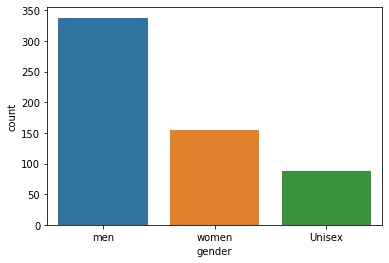

In [105]:
sns.countplot(x = df['gender'])
#secara keselurhan yang membeli item dengan gender pria lebih banyak dibandingkan dengan lainnya

# kesimpulan problem 3

In [ ]:
dari hasil EDA membuktikan bahwa item yang paling banyak/ paling laris adalah item dengan tipe gender pria

# Kumpulan kesimpulan

# Saran yang diberikan pada perusahaan

In [ ]:
1.Saran yang dapat saya berikan pada perusahaan adalah memperbanyak penjualan item dengan tipe gender laki-laki jika ingin lebih meningkatkan
penjualan
2.Untuk menutupi atau memperbaiki dari penjualan barang bertipe non laki-laki dapat dilakukan dengan cara memberikan promo
gratis ongkos pengiriman karena akan menambah minat para pembeli
3. memberikan model item yang lebih variatif untuk meningkatkan penjualan pada item wanita dan unisex karena penjualannya 
tapi jika tidak dilakukan tidak masalah jika perusahaan memang ingin fokus pada penjualan item laki-laki.